## Task Objective:

Hello, I’m Rituraj. I am developing a strategic recommendation using **Python** for **Julia**, the Category Manager, based on an in-depth **data analysis of chip purchasing behavior**.

The primary focus of this analysis is to identify key **customer segments** and gain insights into **who buys chips and what factors influence their purchasing decisions**.

### Key Definitions:

- **LIFESTAGE**: Represents the family and age stage of a customer (e.g., *young singles*, *families with kids*, etc.).
  
- **PREMIUM_CUSTOMER**: Reflects a customer’s **price sensitivity** and **brand preference**, helping to distinguish between value-conscious and premium-oriented buyers.

### **Task Summary**

**Objective:**  
Provide a strategic, data-backed recommendation to Julia (the Category Manager) for the upcoming category review. The focus is on understanding customer segments and chip purchasing behavior.

---

### **Steps Covered in the Notebook (EDA.ipynb)**

1. **Data Import & Basic Cleaning**
   - Loaded two datasets: `QVI_transaction_data.csv` and `QVI_purchase_behaviour.csv`.
   - Merged datasets using `LYLTY_CARD_NBR` (loyalty card number).

2. **Initial Data Exploration**
   - Checked for nulls, duplicates, and outliers.
   - Cleaned up column formats (e.g., converting dates, standardizing names).
   - Removed outliers from product quantities (e.g., suspiciously high pack sizes like 200 units).

3. **Feature Engineering**
   - Extracted **Pack Size** and **Brand Name** from product names.
   - Derived metrics like:
     - Total spend per customer
     - Average unit price
     - Frequency of purchase

4. **Customer Segmentation Analysis**
   - Grouped by:
     - `LIFESTAGE` (e.g., young singles/couples, retirees)
     - `PREMIUM_CUSTOMER` (budget vs. mainstream vs. premium)
   - Analyzed:
     - Average spend
     - Number of transactions
     - Popular chip brands by segment

5. **Key Metrics Considered**
   - Spend per transaction
   - Units per transaction
   - Preference for premium or budget chips
   - Frequency and recency of chip purchases

---

### **Key Initial Findings**

- Mainstream mid-age families tend to spend more on chips overall.
- Premium customers pay more per packet and lean toward branded products.
- Budget-conscious young singles/couples buy more during promotions.
- Some brands or pack sizes are significantly more popular across all segments, indicating strong brand loyalty or pricing attractiveness.

---

### **Strategic Recommendation**

Use these insights to:
- Tailor promotions by customer segment.
- Increase visibility of premium products for premium customers.
- Offer family-sized packs or combo deals for family segments.
- Focus on high-performing brands when allocating shelf space.



In [1]:
import pandas as pd 

In [2]:
# Load Datasets

transactions = pd.read_csv(r"C:\Users\Ritik\Desktop\Quantum\QVI_transaction_data.csv")
purchase_behavior = pd.read_csv(r"C:\Users\Ritik\Desktop\Quantum\QVI_purchase_behaviour.csv")

# Preview
print(transactions.head())
print(purchase_behavior.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [3]:
# Check data types:

print(transactions.info())
print(purchase_behavior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

In [4]:
# Check f missing values 
print(transactions.isnull().sum())
print(purchase_behavior.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [5]:
# Removing Outliers
# Removes extreme values from the data (e.g., someone who bought ₹500 worth of chips in one go might be an error or rare event).
transactions = transactions[transactions['TOT_SALES'] < 100]

In [6]:
# Merging Data  
# Combines both datasets into one based on the customer ID (LYLTY_CARD_NBR).
# Now you can see both transaction and customer info together.
data = pd.merge(transactions, purchase_behavior, on='LYLTY_CARD_NBR')

In [7]:
# Creating New Columns (Extract Pack Size (like 200g from product name)

data['PACK_SIZE'] = data['PROD_NAME'].str.extract(r'(\d+)[Gg]')
data['PACK_SIZE'] = data['PACK_SIZE'].astype(float)


In [8]:
# Extract Brand: (Splits the product name by space, then takes the first word (which is usually the brand name))
data['BRAND'] = data['PROD_NAME'].str.split().str[0]


In [9]:
#Sales by Customer Segment (Groups the data by customer type (like “Young Singles” and “Budget”) and adds up total sales.
# Helps you see which segment is spending the most.)

segment_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()


In [10]:
# Basic Statistics on Total Sales

import numpy as np

sales = data['TOT_SALES'].values

print("Total Sales Stats:")
print(f"Mean: {np.mean(sales):.2f}")
print(f"Median: {np.median(sales):.2f}")
print(f"Standard Deviation: {np.std(sales):.2f}")
print(f"Minimum: {np.min(sales):.2f}")
print(f"Maximum: {np.max(sales):.2f}")

Total Sales Stats:
Mean: 7.30
Median: 7.40
Standard Deviation: 2.53
Minimum: 1.50
Maximum: 29.50


In [12]:
#  Average Spend and Quantity per Transaction:
avg_spend = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
avg_qty = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()


## Total Sales by Customer Segment

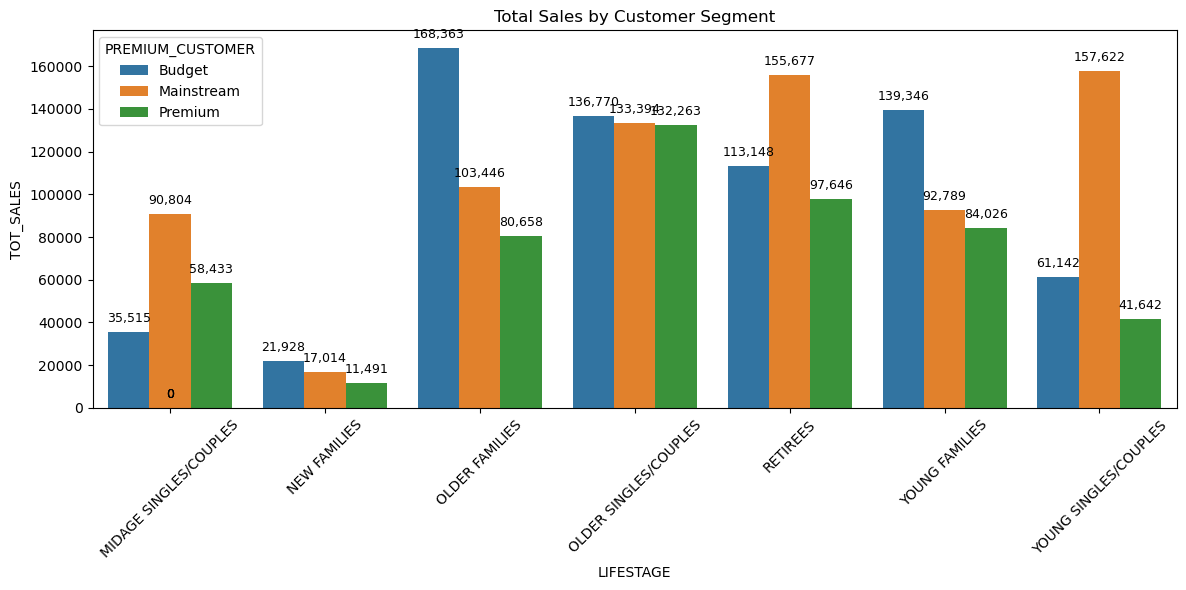

In [23]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=segment_sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Average Quantity per Transaction

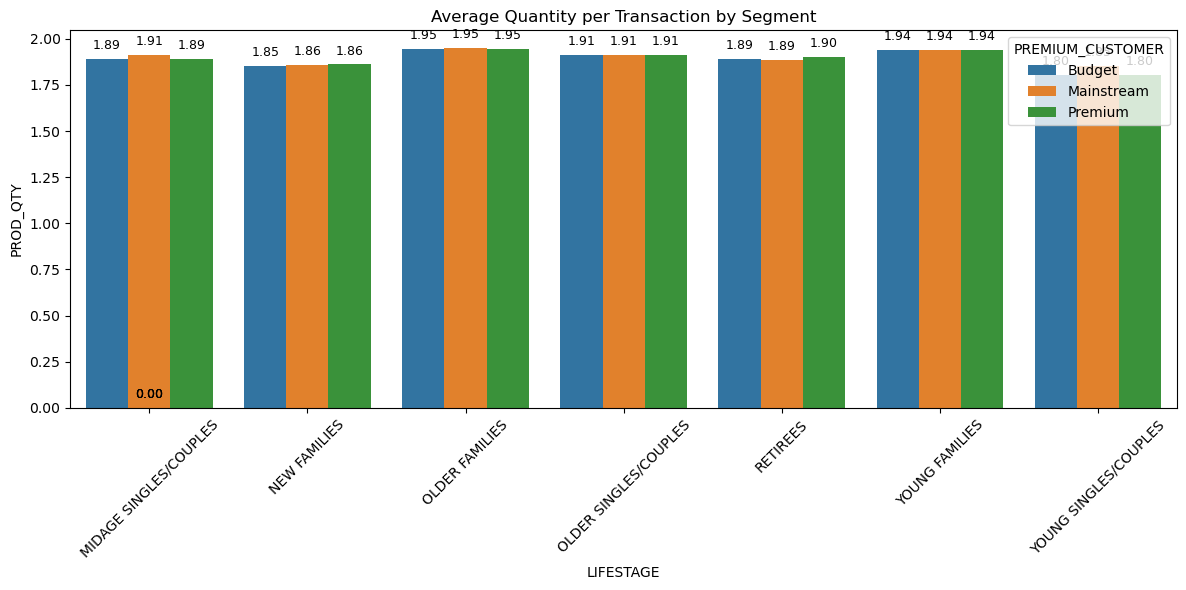

In [24]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=qty_per_customer, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Quantity per Transaction by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average price per Unit by Segment 

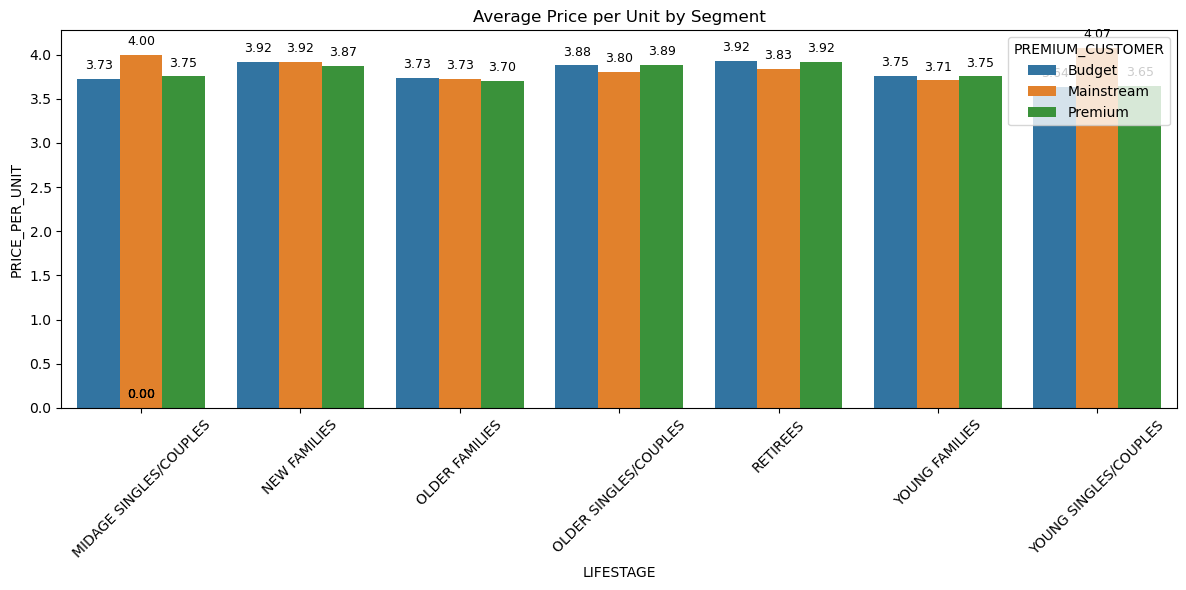

In [25]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=avg_price, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Price per Unit by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top Brands in Target Segment (e.g. Mainstream Young Singles/Couples)



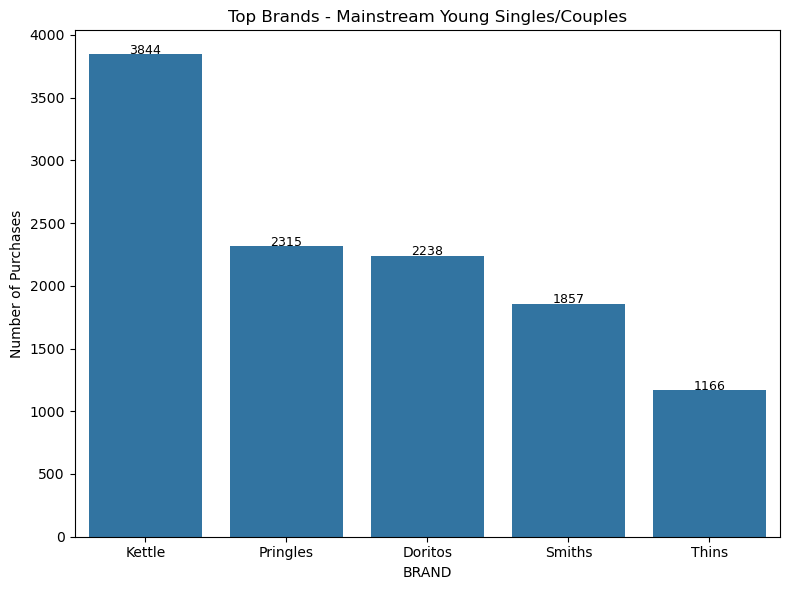

In [26]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=top_brands.index, y=top_brands.values)

for i, v in enumerate(top_brands.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=9)

plt.title('Top Brands - Mainstream Young Singles/Couples')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()


## Which Customer Segment Buys More Per Visit?

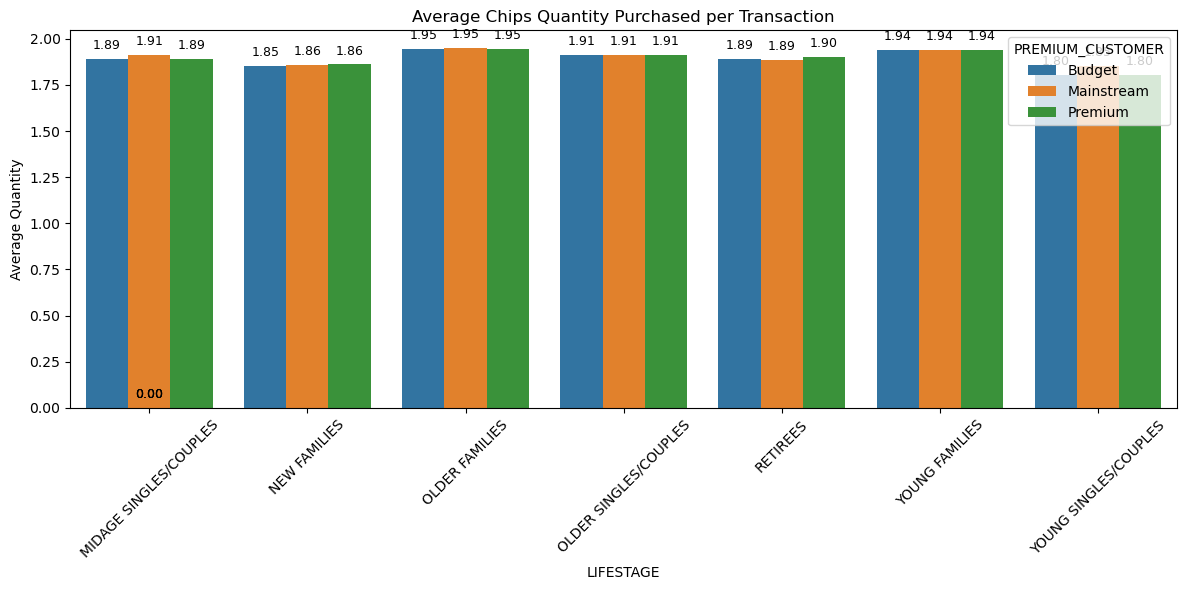

In [14]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=avg_qty, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Chips Quantity Purchased per Transaction')
plt.xticks(rotation=45)
plt.ylabel('Average Quantity')
plt.tight_layout()
plt.show()


## Create Key Metrics

In [15]:
customer_spend = data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
customer_spend.columns = ['CustomerID', 'TotalSpend']


## Metrics by Segment

In [16]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER
segment_metrics = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': ['sum', 'mean'],
    'LYLTY_CARD_NBR': pd.Series.nunique,
    'PROD_NAME': 'count',
    'PACK_SIZE': 'mean'
}).reset_index()

segment_metrics.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 
                           'TotalSales', 'AvgSpendPerTxn', 
                           'UniqueCustomers', 'TotalTransactions', 
                           'AvgPackSize']

print(segment_metrics)


                 LIFESTAGE PREMIUM_CUSTOMER  TotalSales  AvgSpendPerTxn  \
0   MIDAGE SINGLES/COUPLES           Budget    35514.80        7.074661   
1   MIDAGE SINGLES/COUPLES       Mainstream    90803.85        7.647284   
2   MIDAGE SINGLES/COUPLES          Premium    58432.65        7.112056   
3             NEW FAMILIES           Budget    21928.45        7.297321   
4             NEW FAMILIES       Mainstream    17013.90        7.317806   
5             NEW FAMILIES          Premium    11491.10        7.231655   
6           OLDER FAMILIES           Budget   168363.25        7.269570   
7           OLDER FAMILIES       Mainstream   103445.55        7.262395   
8           OLDER FAMILIES          Premium    80658.40        7.208079   
9    OLDER SINGLES/COUPLES           Budget   136769.80        7.430315   
10   OLDER SINGLES/COUPLES       Mainstream   133393.80        7.282116   
11   OLDER SINGLES/COUPLES          Premium   132263.15        7.449766   
12                RETIREE

## Which Brands or Pack Sizes Are More Popular Among Different Segments?

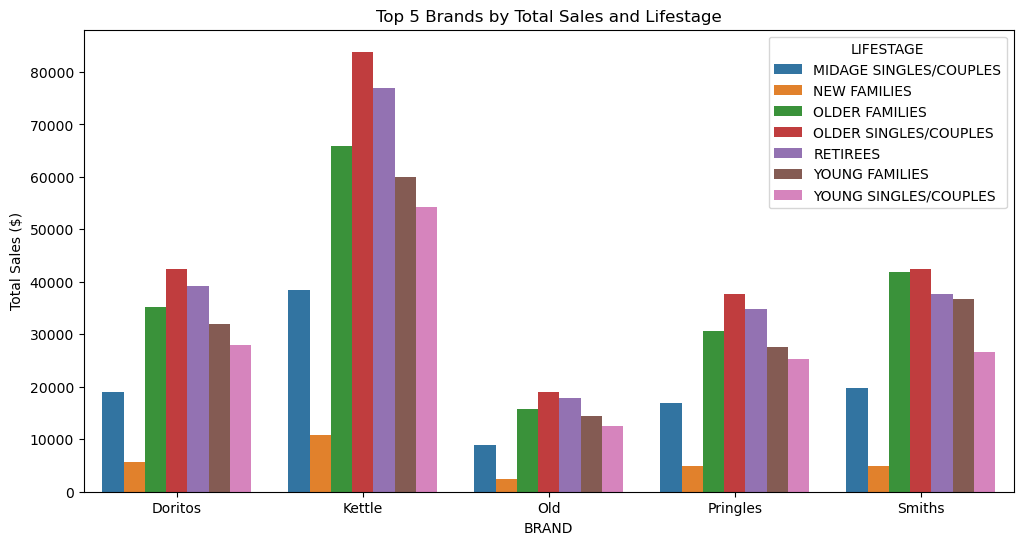

In [17]:
top_brands_segment = data.groupby(['BRAND', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index()
top_brands = top_brands_segment.groupby('BRAND')['TOT_SALES'].sum().nlargest(5).index
filtered = top_brands_segment[top_brands_segment['BRAND'].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.barplot(data=filtered, x='BRAND', y='TOT_SALES', hue='LIFESTAGE')
plt.title('Top 5 Brands by Total Sales and Lifestage')
plt.ylabel('Total Sales ($)')
plt.show()


## The report is created by RITURAJ